In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

# Missing values

In [2]:
df = pd.read_csv('./datasets/housing.csv')

#### Detect missing values

In [3]:
# check which columns have how many missing values
print("Missing values in every column : \n" ,df.isnull().sum())
print("Missing values total : ",df.isnull().sum().sum())

# Display rows that have missing values
missing = df['total_bedrooms'].isnull()
df[missing].head(3)

Missing values in every column : 
 longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64
Missing values total :  207


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
290,-122.16,37.77,47.0,1256.0,NaN,570.0,218.0,4.3750,161900.0,NEAR BAY
341,-122.17,37.75,38.0,992.0,NaN,732.0,259.0,1.6196,85100.0,NEAR BAY
538,-122.28,37.78,29.0,5154.0,NaN,3741.0,1273.0,2.5762,173400.0,NEAR BAY


#### Drop missing values NaN

In [4]:
# Drop all rows with NaN
df = df.dropna()

# Drop all rows with NaN in a specific column
df = df[df['total_bedrooms'].notnull()]

# Drop all cols with NaN
df = df.dropna(axis=1)

#### Fill missing values

In [5]:
# Replace with a value
df = df.fillna(df['total_bedrooms'].median())
df = df.fillna(df['total_bedrooms'].mean())
df = df.fillna(15)

# interpolate
df = df.interpolate('linear')

# Duplicates
- Duplicates = Repeated data rows

In [6]:
df = pd.read_csv('./datasets/UCI_Credit_Card.csv')

#### Detect duplicates

In [7]:
# All cols
df[df.duplicated(subset=df.columns)]

# One specific col
df[df.duplicated(subset=['ID'])]

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month


#### Drop duplicates

In [8]:
# All cols
df = df.drop_duplicates(subset=df.columns)

# One specific col
df = df.drop_duplicates(subset=['ID'])

# Inconsistent Data

#### Check

In [9]:
######### Default definition #########
# SEX: Gender (1=male, 2=female)
# EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others)
# MARRIAGE: Marital status (1=married, 2=single, 3=others)

######### Check #########
categorical_variables = ['SEX','EDUCATION','MARRIAGE']
print('Number of unique values of categorical variables: ')
print(df[categorical_variables].nunique(), end='\n\n')

# Print Unique values
print('Unique values of SEX : ', df['SEX'].unique())
print('Unique values of EDUCATION : ', df['EDUCATION'].unique())
print('Unique values of MARRIAGE : ', df['MARRIAGE'].unique())

Number of unique values of categorical variables: 
SEX          2
EDUCATION    7
MARRIAGE     4
dtype: int64

Unique values of SEX :  [2 1]
Unique values of EDUCATION :  [2 1 3 5 4 6 0]
Unique values of MARRIAGE :  [1 2 3 0]


$\to$ EDUCATION and MARRIAGE are inconsistent

#### Fix

In [10]:
# EDUCATION
condition = (df['EDUCATION'] == 0 ) | (df['EDUCATION'] == 5 ) | (df['EDUCATION'] == 6 )
df.loc[condition, 'EDUCATION'] = 4
print('Unique values of EDUCATION after changing: ', df['EDUCATION'].unique())

# MARRIAGE
condition = (df['MARRIAGE'] == 0) 
df.loc[condition, 'MARRIAGE'] = 3
print('Unique values of MARRIAGE after changing: ', df['MARRIAGE'].unique())

Unique values of EDUCATION after changing:  [2 1 3 4]
Unique values of MARRIAGE after changing:  [1 2 3]


# Outliers

In [11]:
df = pd.read_csv('./datasets/sales_data.csv')

#### Detect

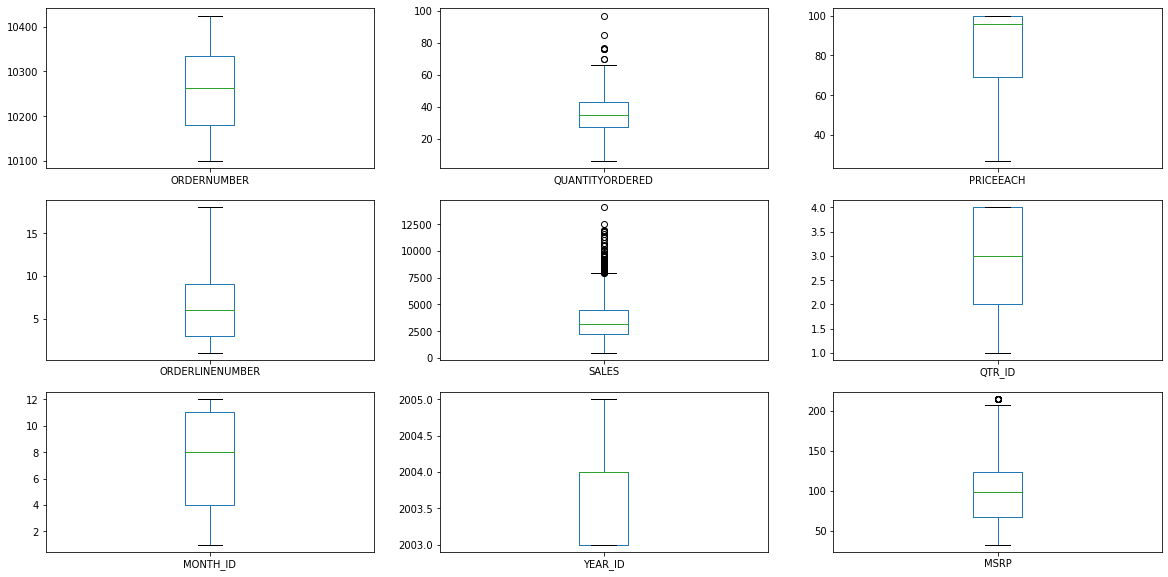

In [12]:
df.plot(
    kind = 'box',
    subplots = True,
    layout = (3,3),
    sharex = False, sharey=False,
    figsize=(20,10))
plt.show()

- `SALES` and `QUANTITYORDERED` have a few outliers
- `MSRP` has one outlier

#### Filter by IQR

In [13]:
# Retrieve only outlier columns
outlier_df = df[['QUANTITYORDERED','MSRP','SALES']]

# find max and min using IQR
Q1 = outlier_df.quantile(0.25)
Q3 = outlier_df.quantile(0.75)
IQR = Q3-Q1
minimum = Q1 - 1.5*IQR
maximum = Q3 + 1.5*IQR

# Filter rows that have outliers
condition = ((outlier_df <= maximum) & (outlier_df >= minimum)) \
    .all(axis=1)
df = df[condition]

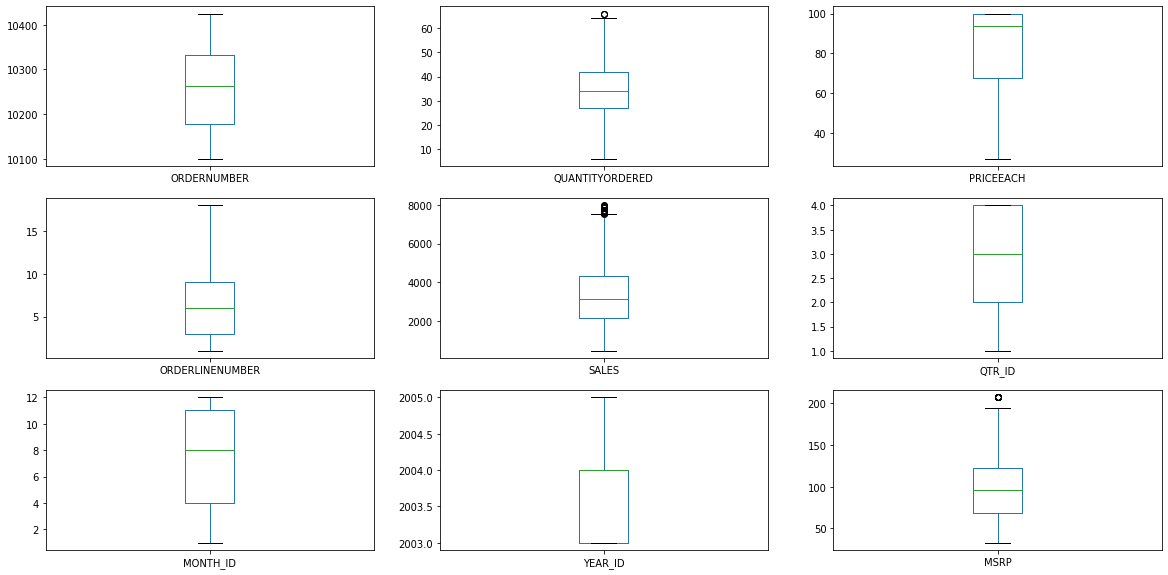

In [14]:
df.plot(
    kind = 'box',
    subplots = True,
    layout = (3,3),
    sharex = False, sharey=False,
    figsize=(20,10))
plt.show()

#### filter by z-scores

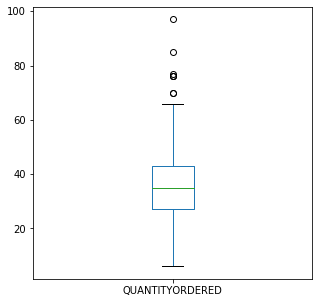

In [15]:
df = pd.read_csv('./datasets/sales_data.csv')

df['QUANTITYORDERED'].plot(
    kind = 'box',
    figsize=(5,5))
plt.show()

In [16]:
# mean and std
mean = df['QUANTITYORDERED'].mean()
std = df['QUANTITYORDERED'].std()

# z-scores
z_scores = np.abs((df['QUANTITYORDERED'] - mean) / std)

# filter using z-scores
df = df[z_scores < 3]

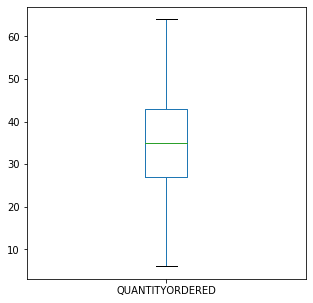

In [17]:
df['QUANTITYORDERED'].plot(
    kind = 'box',
    figsize=(5,5))
plt.show()